# Restaurant Recommendation using Collaborative Filtering

### Rajanya Dhar (rd753)
### Course: CS 553



In [1]:
import pandas as pd
import numpy as np
try:
    import cPickle as pickle
except:
    import pickle
import io

## Preparing data 
We obtain the data from Yelp -> https://www.yelp.com/dataset.

The files that we are interested in are:

1. yelp_academic_dataset_review.json

2. yelp_academic_dataset_business.json

The format of these json files can be found over here -> https://www.yelp.com/dataset/documentation/main 

In [2]:
path = 'data/'

### Processing in Spark

'yelp_academic_dataset_business.json' is processed to:

1. retrieve a city with the highest number of restaurants. This city turns out to be Toronto.

2. store columns: <i>business_id, name, latitude, longitude</i> by filtering <i>"city" === "Toronto"</i> in a file named 'restaurants_toronto.csv'.

'yelp_academic_dataset_review.json' is processed to:

1. filter all the rows with the above obtained business_ids', that is, we are interested only with LA based restaurants.

2. store columns: <i>business_id, user_id, stars</i> in a file named 'ratings_toronto.csv'.


### Ratings/Stars

In [3]:
ratings = pd.read_csv(path+'ratings_toronto.csv')
ratings.head()

business_id                 user_id  stars        date
0  OR6iRk0vrMzE-1gLg-WYrw  YHWsLBS8jzZiPjKHMFOaAA      2  2010-11-22
1  VhQXJteVrG3L-wq8HlYFqw  YHWsLBS8jzZiPjKHMFOaAA      4  2012-01-13
2  CN5nuUQod0f8g3oh99qq0w  YHWsLBS8jzZiPjKHMFOaAA      4  2011-04-02
3  wVc3g-YfyDvkOLDecpr4DA  YHWsLBS8jzZiPjKHMFOaAA      5  2012-03-16
4  amsvLzfEvCzLwP0MnXAJ1w  YHWsLBS8jzZiPjKHMFOaAA      4  2010-11-18

### Restaurant details

In [4]:
restaurants = pd.read_csv(path + 'restaurants_toronto.csv')
restaurants.head()

business_id                                         categories  \
0  YIez_A3WOt9J2SXN7OMa2Q             Caribbean, Food, Bakeries, Restaurants   
1  cuXCQM-9VwpZlSneEY1b3w    Nightlife, Wine Bars, Indian, Restaurants, Bars   
2  hsWx7ya8jLMhi8ZWX23Thg  American (Traditional), Burgers, Fast Food, Re...   
3  i2Fd0dl39BZ8nVxBnSPsKg  Salad, Chicken Wings, Sandwiches, Pizza, Resta...   
4  _T8qy9XAKAFLJdmoLg1Q-g                               Mexican, Restaurants   

    latitude  longitude                        name  stars  review_count  \
0  43.745928 -79.324623             Allwyn's Bakery    4.0           105   
1  43.708002 -79.375814  Indian Street Food Company    3.5            51   
2  43.706983 -79.396499        Harvey's Restaurants    2.0             5   
3  43.691085 -79.575587                  Anchor Bar    3.0            38   
4  43.772992 -79.414052                Burrito Boyz    4.0           121   

  postal_code  
0     M3A 1K8  
1     M4G 3C1  
2     M4P 1G6  
3     M9W 1J1  
4         M2N

In [5]:
g = ratings.groupby('user_id')['stars'].count()
topUsers =g .sort_values(ascending=False)[:15]
#print(topUsers)

g = ratings.groupby('business_id')['stars'].count()
topRestaurants = g.sort_values(ascending=False)[:15]
#print(Restaurants)

top_r = ratings.join(topUsers, rsuffix='_s', how='inner', on='user_id')
#print(top_r)
top_r = top_r.join(topRestaurants, rsuffix='_r', how='inner', on='business_id')
#print(top_r)

pd.crosstab(top_r.user_id, top_r.business_id, top_r.stars, aggfunc=np.sum)

business_id             73_UT7fZ7mzXcguX8-oSuQ  BUcTdN-rNE8urCCQuxSOQA  \
user_id                                                                  
0uNxhZAFbkalQImzJ6UDUA                     NaN                     3.0   
2vJ2e51kdbdAmAo_HTr4KQ                     NaN                     NaN   
3uWCWMWcrn8YSH_qBvlr6w                     NaN                     NaN   
8HCEPF0IflyB690Q745fKg                     NaN                     2.0   
HWLr60IBXAy9HD23W3Xmfg                     NaN                     NaN   
JmMXYQJio5eXgOvVZl_xGw                     NaN                     NaN   
KgFOJnWXxVuz0b-xfo6jjw                     4.0                     NaN   
LmWO_u9v7e1vMJlNykjUoA                     NaN                     2.0   
R_evEjQUmtzNalScjk2_Zg                     NaN                     NaN   
S10Q9h_W-MKyog8IdcCNCQ                     NaN                     NaN   
TaJ3hRYUW9Z82HF0qc4hFQ                     NaN                     NaN   
UXpTrzITc0yg08sXftsa-w                     2.0                     NaN   
fAfGwjh5A_ydd0A4ZdGenw                     NaN                     3.0   
gS4QCL6j_umAyfJXBGAZJQ                     NaN                     NaN   
m7z-tX6XDZ27xGhGjnI21w                     NaN                     NaN   

business_id             CN5nuUQod0f8g3oh99qq0w  MS-hfug4QDXqb_Mws3qlzA  \
user_id                                                                  
0uNxhZAFbkalQImzJ6UDUA                     NaN                     NaN   
2vJ2e51kdbdAmAo_HTr4KQ                     NaN                     NaN   
3uWCWMWcrn8YSH_qBvlr6w                     NaN                     NaN   
8HCEPF0IflyB690Q745fKg                     NaN                     4.0   
HWLr60IBXAy9HD23W3Xmfg                     NaN                     NaN   
JmMXYQJio5eXgOvVZl_xGw                     NaN                     4.0   
KgFOJnWXxVuz0b-xfo6jjw                     NaN                     NaN   
LmWO_u9v7e1vMJlNykjUoA                     NaN                     5.0   
R_evEjQUmtzNalScjk2_Zg                     NaN                     4.0   
S10Q9h_W-MKyog8IdcCNCQ                     NaN                     NaN   
TaJ3hRYUW9Z82HF0qc4hFQ                     NaN                     NaN   
UXpTrzITc0yg08sXftsa-w                     NaN                     NaN   
fAfGwjh5A_ydd0A4ZdGenw                     NaN                     5.0   
gS4QCL6j_umAyfJXBGAZJQ                     4.0                     3.0   
m7z-tX6XDZ27xGhGjnI21w                     NaN                     NaN   

business_id             O-uIEuv7JLUHajkemx_sVw  O1TvPrgkK2bUo5O5aSZ7lw  \
user_id                                                                  
0uNxhZAFbkalQImzJ6UDUA                     3.0                     NaN   
2vJ2e51kdbdAmAo_HTr4KQ                     NaN                     NaN   
3uWCWMWcrn8YSH_qBvlr6w                     NaN                     NaN   
8HCEPF0IflyB690Q745fKg                     4.0                     3.0   
HWLr60IBXAy9HD23W3Xmfg                     NaN                     NaN   
JmMXYQJio5eXgOvVZl_xGw                     NaN                     NaN   
KgFOJnWXxVuz0b-xfo6jjw                     NaN                     4.0   
LmWO_u9v7e1vMJlNykjUoA                     NaN                     4.0   
R_evEjQUmtzNalScjk2_Zg                     4.0                     NaN   
S10Q9h_W-MKyog8IdcCNCQ                     NaN                     NaN   
TaJ3hRYUW9Z82HF0qc4hFQ                     NaN                     3.0   
UXpTrzITc0yg08sXftsa-w                     NaN                     2.0   
fAfGwjh5A_ydd0A4ZdGenw                     NaN                     NaN   
gS4QCL6j_umAyfJXBGAZJQ                     NaN                     NaN   
m7z-tX6XDZ27xGhGjnI21w                     NaN                     NaN   

business_id             O_UC_izJXcAmkm6HlEyGSA  RtUvSWO_UZ8V3Wpj0n077w  \
user_id                                                                  
0uNxhZAFbkalQImzJ6UDUA                     NaN                     5.0   
2

## Model: Collaborative Filtering

In [6]:
u_uniq = ratings.user_id.unique()
user2idx = {o:i for i,o in enumerate(u_uniq)}
ratings.user_id = ratings.user_id.apply(lambda x: user2idx[x])

r_uniq = ratings.business_id.unique()
restaurant2idx = {o:i for i,o in enumerate(r_uniq)}
ratings.business_id = ratings.business_id.apply(lambda x: restaurant2idx[x])

res_names_interim = restaurants.set_index('business_id')['name'].to_dict()
res_names = dict()
for orig_id, mapped_id in restaurant2idx.items():
    res_names[mapped_id] = res_names_interim[orig_id]

n_users = int(ratings.user_id.nunique())
n_restaurants = int(ratings.business_id.nunique())

print(n_users, n_restaurants)

14720 1453


In [7]:
min_rating,max_rating = ratings.stars.min().astype(np.float64),ratings.stars.max().astype(np.float64)
min_rating,max_rating

(1.0, 5.0)

In [8]:
def get_emb(ni,nf):
    e = nn.Embedding(ni, nf)
    e.weight.data.uniform_(-0.01,0.01)
    return e

In [9]:
import torch.nn as nn
from fastai.learner import *
from fastai.column_data import *
n_factors = 50

class EmbeddingNet(nn.Module):
    def __init__(self, n_users, n_restaurants, nh=10, p1=0.05, p2=0.5):
        super().__init__()
        (self.u, self.r) = [get_emb(*o) for o in [
            (n_users, n_factors), (n_restaurants, n_factors)]]
        self.lin1 = nn.Linear(n_factors*2, nh)
        self.lin2 = nn.Linear(nh, 1)
        self.drop1 = nn.Dropout(p1)
        self.drop2 = nn.Dropout(p2)
        
    def forward(self, cats, conts):
        users,restaurants = cats[:,0],cats[:,1]
        x = self.drop1(torch.cat([self.u(users),self.r(restaurants)], dim=1))
        x = self.drop2(F.relu(self.lin1(x)))
        return F.sigmoid(self.lin2(x)) * (max_rating-min_rating+1) + min_rating-0.5

In [10]:
import torch.optim as optim

wd=1e-5
model = EmbeddingNet(n_users, n_restaurants)
opt = optim.Adam(model.parameters(), 1e-4, weight_decay=wd)

In [11]:
x = ratings.drop(['stars', 'date'],axis=1)
y = ratings['stars'].astype(np.float32)

In [12]:
val_idxs = get_cv_idxs(len(ratings))

In [13]:
data = ColumnarModelData.from_data_frame(path, val_idxs, x, y, ['user_id', 'business_id'], 64)

In [14]:
fit(model, data, 6, opt, F.mse_loss)

  1%|▏         | 5/335 [00:00<00:07, 43.25it/s, loss=1.99]

/usr/local/lib/python3.7/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epoch      trn_loss   val_loss                               
    0      1.853544   1.90411   
    1      1.809621   1.864704                              
    2      1.812546   1.812788                              
    3      1.703839   1.758854                              
    4      1.6176     1.707508                              
    5      1.513485   1.669295                              



[1.6692948748023348]

In [15]:
math.sqrt(1.896)

1.3769531582446803

In [16]:
wd=2e-4
cf = CollabFilterDataset.from_data_frame(path, ratings, 'user_id', 'business_id', 'stars')
learn = cf.get_learner(n_factors, val_idxs, 64, opt_fn=optim.Adam)

In [17]:
learn.fit(lrs=1e-2, n_cycle=3, wds=wd, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss                               
    0      1.828083   1.842438  
    1      1.525633   1.681866                               
    2      0.836968   1.678095                               
    3      0.991395   1.672732                                
    4      0.642838   1.641688                               
    5      0.488742   1.637293                               
    6      0.333107   1.636654                               



[1.6366536444272866]

RMSE

In [18]:
math.sqrt(1.6278)

1.2758526560696575

In [19]:
preds = learn.predict()

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


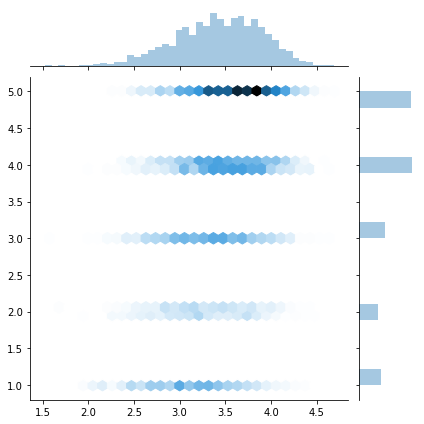

In [20]:
y=learn.data.val_y
sns.jointplot(preds, y, kind='hex', stat_func=None)

## Analysis

### Restaurant Bias

In [21]:
#res_names = restaurants.set_index('business_id')['name'].to_dict()
g = ratings.groupby('business_id')['stars'].count()
topRestaurants = g.sort_values(ascending=False).index.values[:3000]
topRestaurantIdx = np.array([cf.item2idx[o] for o in topRestaurants])

In [22]:
m = learn.model; 

First, we'll look at the restaurant bias term. Here, our input is the business id (a single id), and the output is the restaurant bias (a single float).

In [23]:
res_bias = to_np(m.ib(V(topRestaurantIdx)))

In [24]:
res_bias

array([[0.9394 ],
       [1.13759],
       [0.97899],
       ...,
       [0.34318],
       [0.3534 ],
       [0.24908]], dtype=float32)

In [25]:
res_ratings = [(b[0], res_names[i]) for i,b in zip(topRestaurants,res_bias)]

Now we can look at the top and bottom rated restaurants. These ratings are corrected for different levels of reviewer sentiment, as well as different types of restaurants that different reviewers visited.

In [26]:
sorted(res_ratings, key=lambda o: o[0])[:15]

[(-1.0149826, 'Wild Wing'),
 (-0.96874243, 'Amato Pizza'),
 (-0.84751, 'Toula Restaurant & Bar'),
 (-0.8096486, 'Swiss Chalet Rotisserie & Grill'),
 (-0.75863326, "McDonald's"),
 (-0.75221235, 'La Tortilleria'),
 (-0.7027916, 'The Friendly Thai'),
 (-0.68794906, 'Ho Lee Chow'),
 (-0.6784935, 'Paramount Fine Foods'),
 (-0.6690331, 'Saigon Flower Restaurant'),
 (-0.66892856, 'Pizza Hut'),
 (-0.6650322, 'Dominos Pizza'),
 (-0.6577099, 'Sakura Japanese Restaurant'),
 (-0.65625596, "McDonald's"),
 (-0.6551666, 'Schezuan Express')]

In [27]:
sorted(res_ratings, key=lambda o: o[0], reverse=True)[:15]

[(1.4154779, 'Infuse Cafe Bar'),
 (1.3844215, 'Huevos Gourmet'),
 (1.3791536, 'Alo Restaurant'),
 (1.3373501, 'Jacobs & Co. Steakhouse'),
 (1.3149669, 'Pukka'),
 (1.3012488, 'Mystic Muffin'),
 (1.2910442, 'George'),
 (1.2229398, 'Rasa'),
 (1.20981, 'COO Café Bread or Rice'),
 (1.205605, 'Black Camel'),
 (1.1989596, "Blaze Fast-Fire'd Pizza"),
 (1.1845945, 'Kintako Japanese Restaurant'),
 (1.1802481, 'Tofu Village - House of Soon Tofu'),
 (1.1542978, 'Completo'),
 (1.1517388, 'Thoroughbred Food & Drink')]

### Embedding interpretation
We can now do the same thing for the embeddings.

In [28]:
restaurant_emb = to_np(m.i(V(topRestaurantIdx)))
restaurant_emb.shape

(1453, 50)

Because it's hard to interpret 50 embeddings, we use PCA to simplify them down to just 3 vectors.

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
restaurant_pca = pca.fit(restaurant_emb.T).components_

In [30]:
restaurant_pca.shape

(3, 1453)

In [31]:
fac0 = restaurant_pca[0]
restaurant_comp = [(f, res_names[i]) for f,i in zip(fac0, topRestaurants)]

Here's the 1st component. It seems to be 'high' and 'low' review count.

In [32]:
sorted(restaurant_comp, key=itemgetter(0), reverse=True)[:10]

[(0.16420467, 'KINKA IZAKAYA ORIGINAL'),
 (0.14856866, 'Khao San Road'),
 (0.14637332, 'Nomé Izakaya'),
 (0.14429723, 'Jacobs & Co. Steakhouse'),
 (0.13489093, 'Beerbistro'),
 (0.13154113, "Mildred's Temple Kitchen"),
 (0.1143447, 'Korean Grill House'),
 (0.11225678, 'Yueh Tung Restaurant'),
 (0.1086891, 'Electric Mud BBQ'),
 (0.10853196, 'Poke Guys')]

In [33]:
sorted(restaurant_comp, key=itemgetter(0))[:10]

[(-0.10497643, 'Paupers Pub'),
 (-0.10493838, 'Starving Artist'),
 (-0.09666108, 'Smith'),
 (-0.084797174, 'Euro Shawarma'),
 (-0.082135156, 'Harlem Underground'),
 (-0.07748868, 'Grasshopper Restaurant'),
 (-0.07662465, 'Hot House Restaurant & Bar'),
 (-0.07585493, 'Spice Thai Cafe'),
 (-0.07361699, 'Pizza Gigi'),
 (-0.07328999, 'Asian Legend')]

In [34]:
fac1 = restaurant_pca[1]
restaurant_comp = [(f, res_names[i]) for f,i in zip(fac1, topRestaurants)]

Here's the 2nd component. It seems to be "Mexican, Cuban etc" vs "Asian (Chinese, Korean etc)" cuisine. 

In [35]:
sorted(restaurant_comp, key=itemgetter(0), reverse=True)[:10]

[(0.14579295, 'Grand Electric'),
 (0.13420443, 'KINKA IZAKAYA ORIGINAL'),
 (0.12600657, 'Woodlot Restaurant'),
 (0.12308792, 'JOEY Eaton Centre'),
 (0.12115444, 'Mamakas Taverna'),
 (0.11101716, 'Paramount Fine Foods'),
 (0.10833056, "Poutini's House of Poutine"),
 (0.105237484, 'R&D Restaurant'),
 (0.10279934, 'Electric Mud BBQ'),
 (0.098197885, "C'est What")]

In [36]:
sorted(restaurant_comp, key=itemgetter(0))[:10]

[(-0.12954834, 'School Restaurant'),
 (-0.11153803, 'VIPS Sushi'),
 (-0.10591934, 'La Bettola di Terroni'),
 (-0.096668646, 'Taste of China'),
 (-0.09530133, 'Thai Shan Inn'),
 (-0.09463695, 'Kit Kat Italian Bar & Grill'),
 (-0.093867265, 'Jacobs & Co. Steakhouse'),
 (-0.09382228, "Fring's"),
 (-0.08961185, 'Drake One Fifty'),
 (-0.0881316, 'Grenadier Cafe')]

We can draw a picture to see how various restaurants appear on the map of these components. This picture shows the first two components.

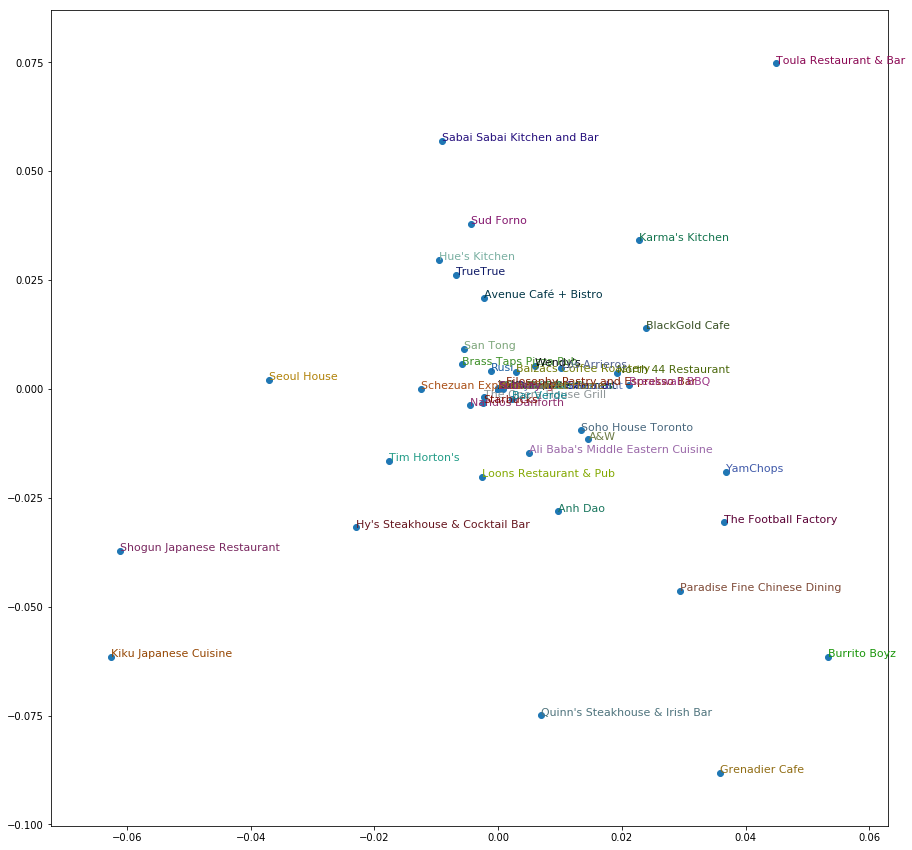

In [37]:
idxs = np.random.choice(len(topRestaurants), 50, replace=False)
X = fac0[idxs]
Y = fac1[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(topRestaurants[idxs], X, Y):
    plt.text(x,y,res_names[i], color=np.random.rand(3)*0.7, fontsize=11)
plt.show()